In [2]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


import matplotlib.pyplot as plt

### Grabbing the Data

In [3]:
train = datasets.MNIST('', train=True, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))

test  = datasets.MNIST('', train=False, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))

## Creating the Dataset Tensor

In [4]:
BATCH_SIZE = 10
trainSet = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
testSet  = torch.utils.data.DataLoader(test,  batch_size=BATCH_SIZE, shuffle=True)

#### Viewing one Sample

Label : tensor(1)


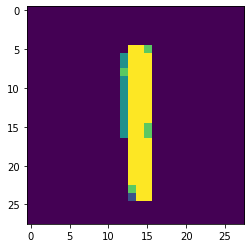

In [5]:
i = 2 # ranging from 0-32
for data in trainSet:
    # data --> one batch containing 32 samples
    x, y = data[0][i], data[1][i]
    break

print('Label :', y)
plt.imshow(x.view(28, 28)) # Reshaping x from (1, Height, Width) --> (Height, Width)

### Checking the Balancing of the Data

Text(0, 0.5, 'Percentage')

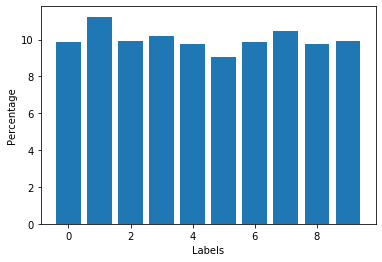

In [6]:
total = 0
counter = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainSet:
        y = data[1]
        for sample in y:
            counter[int(sample)] += 1
            total += 1
            
for key in counter:
    percentage = round(counter[key]/total * 100, 2)
    counter[key] = percentage

x = [key for key in counter]
y = [counter[key] for key in counter]
plt.bar(x, y)
plt.xlabel('Labels')
plt.ylabel('Percentage')

# The Data is BALANCED

## Creating the Network Structure

In [7]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64,    64)        
        self.fc3 = nn.Linear(64,    64)        
        self.fc4 = nn.Linear(64,    10)        
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))        
        x = F.relu(self.fc3(x))        
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

## Training the Network

In [9]:
LEARNING_RATE = 0.001 #1e-3
EPOCHS        = 3

net = Net()

loss_function = nn.CrossEntropyLoss()
# Define Optimizer
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

# Iteration Begins
for epoch in range(EPOCHS):
    # Iterate over every sample in the batch
    for data in trainSet:
        x, y = data
        net.zero_grad()
        
        #Compute the output
        output = net(x.view(-1, 28*28))
        
        # Compute Loss
        loss = F.nll_loss(output, y)
        
        # Backpropagate
        loss.backward()
        
        # Update Parameters
        optimizer.step()
        
    print(loss)

tensor(0.0315, grad_fn=<NllLossBackward>)
tensor(0.4898, grad_fn=<NllLossBackward>)
tensor(0.0033, grad_fn=<NllLossBackward>)


In [18]:
correct, total = 0, 0

with torch.no_grad():
    for data in trainSet:
        x, y = data
        output = net(x.view(-1, 28*28))
        
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
    trainAccuracy = round(correct/total *100, 2)
    
    for data in testSet:
        x, y = data
        output = net(x.view(-1, 28*28))
        
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
    testAccuracy = round(correct/total *100, 2)
    
print('Train Accuracy :', trainAccuracy, '%')
print('Test Accuracy  :', testAccuracy, '%')

Train Accuracy : 97.99 %
Test Accuracy  : 97.83 %
